In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/lenovo/Downloads/automobileEDA.csv')

In [3]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
import numpy as np

In [5]:
from sklearn import linear_model

In [6]:
model = linear_model.LinearRegression()

In [7]:
model.fit(df[['highway-mpg']],df['price'])

LinearRegression()

In [8]:
Yhat = model.predict(df[['highway-mpg']])

In [9]:
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [10]:
model.intercept_

38423.305858157386

In [11]:
model.coef_

array([-821.73337832])

In [12]:
lm1 = linear_model.LinearRegression()

In [13]:
lm1.fit(df[['engine-size']],df['price'])

LinearRegression()

In [14]:
Yhat1=lm1.predict(df[['engine-size']])

In [15]:
lm1.intercept_

-7963.338906281049

In [16]:
lm1.coef_

array([166.86001569])

In [17]:
lm2= linear_model.LinearRegression()

In [18]:
lm2.fit(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],df['price'])

LinearRegression()

In [19]:
Yhat3= lm2.predict(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [20]:
lm2.intercept_

-15806.624626329198

In [21]:
lm2.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [22]:
import seaborn as sns

(0.0, 48165.68124266829)

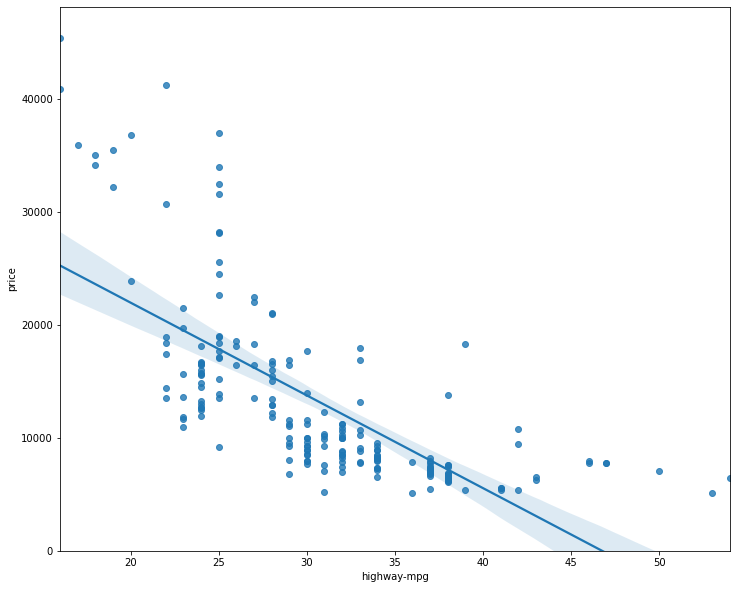

In [23]:
width =12
height =10
plt.figure(figsize=(width,height))
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)

(0.0, 47414.1)

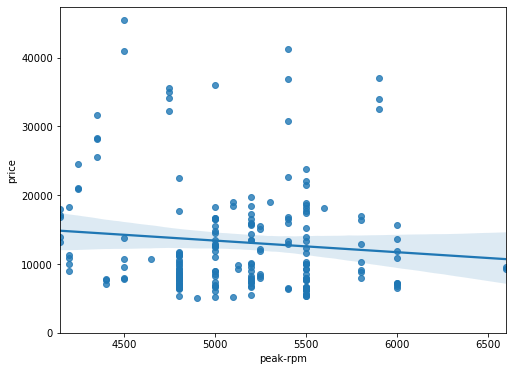

In [24]:
width =8
height=6
plt.figure(figsize= (width,height))
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

In [25]:
df[['highway-mpg','peak-rpm','price']].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

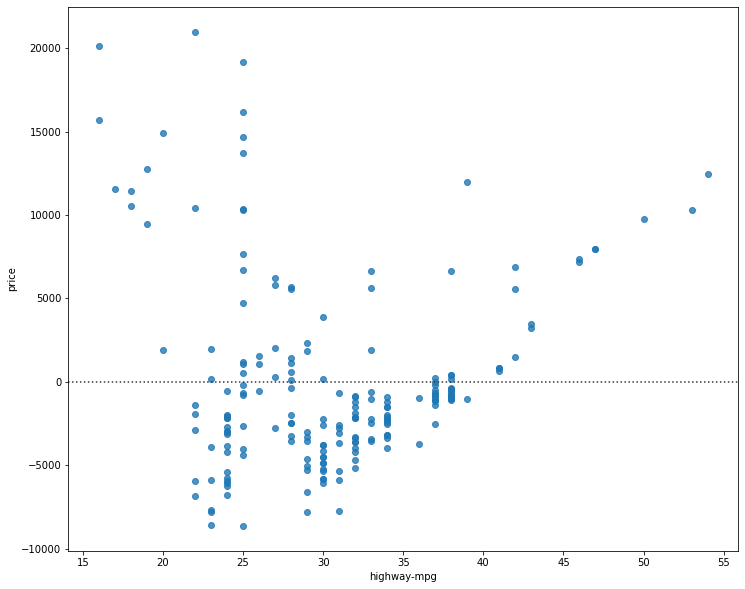

In [26]:
plt.figure(figsize=(12,10))
sns.residplot(df['highway-mpg'],df['price'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


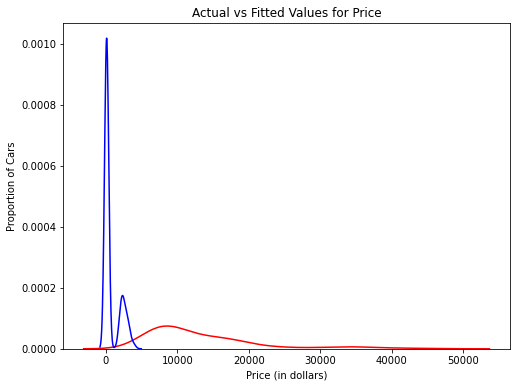

In [27]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [28]:
def PlotPolly(model,independent_variable,dependent_variable,Name):
    x_new=np.linspace(15,55,1000)
    y_new=model(x_new)
    plt.plot(independent_variable,dependent_variable,'.',x_new,y_new,'-')
    plt.title('Polynomial Fit with Matplotlib for Price ^ length')
    ax= plt.gca()
    ax.set_facecolor((0.898,0.898,0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    plt.show()
    plt.close()

In [29]:

np.poly1d(np.polyfit(df['highway-mpg'],df['price'],3))

poly1d([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [30]:
x = df['highway-mpg']
y = df['price']

In [31]:
f = np.polyfit(x,y,3)
p = np.poly1d(f)

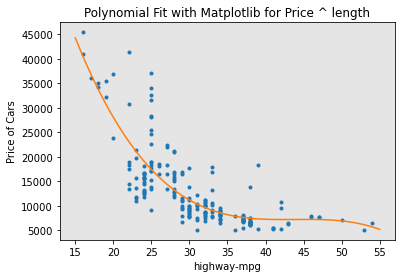

In [32]:
PlotPolly(p,x, y, 'highway-mpg')

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
pr = PolynomialFeatures()

In [35]:
pr

PolynomialFeatures()

In [36]:
Z = df[['highway-mpg','peak-rpm','price']]

In [37]:
Z_pr = pr.fit_transform(Z)

In [38]:
Z_pr.shape


(201, 10)

### Pipeline

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 

In [40]:
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias = False)),('model',LinearRegression())]

<IPython.core.display.Javascript object>

In [41]:
pipe = Pipeline(Input)

In [42]:
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [43]:
Z = Z.astype(float)

In [44]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [45]:
ypipe = pipe.predict(Z)

In [46]:
ypipe[0:4]

array([13495., 16500., 16500., 13950.])

Use PipeLine in easy way

In [47]:
Z = df[['highway-mpg','curb-weight','engine-size','horsepower']]

In [48]:
Input = [('Scaler',StandardScaler()),('model',LinearRegression())]

<IPython.core.display.Javascript object>

In [49]:
pipe = Pipeline(Input)

In [50]:
pipe.fit(Z,y)

Pipeline(steps=[('Scaler', StandardScaler()), ('model', LinearRegression())])

In [51]:
ypipe = pipe.predict(Z)

In [52]:
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

# Simple Linear Regression

In [53]:
model.fit(df[['highway-mpg']],df['price'])

LinearRegression()

In [54]:
model.score(df[['highway-mpg']],df['price'])

0.4965911884339175

In [55]:
Yhat=model.predict(df[['highway-mpg']])

In [56]:
Yhat[0:4]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ])

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
mse= mean_squared_error(df['price'],Yhat)

In [59]:
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


# Multiple Linear Regression 

In [60]:
model.fit(Z,df['price'])

LinearRegression()

In [62]:
print('The R-square is:' , model.score(Z,df['price']))

The R-square is: 0.8093562806577458


In [63]:
Y_predict_multifit = model.predict(Z)

In [64]:
print('Comparison:', mean_squared_error(df['price'],Y_predict_multifit))

Comparison: 11980366.870726487


# Polynomial Fit 

In [65]:
from sklearn.metrics import r2_score

In [66]:
r_squared = r2_score(y,p(x))

In [67]:
r_squared

0.674194666390652

In [78]:
mean_squared_error(df['price'],p(x))

20474146.426361218

# Prediction and Decision Making 

In [74]:
new_input = np.arange(1,100,1).reshape(-1,1)

In [71]:
model.fit(df[['highway-mpg']],df['price'])

LinearRegression()

In [72]:
model

LinearRegression()

In [75]:
yhat = model.predict(new_input)

In [76]:
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

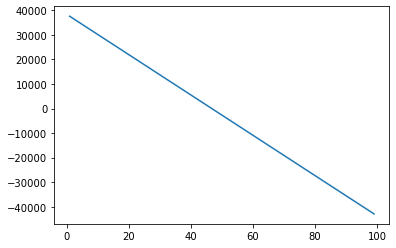

In [77]:
plt.plot(new_input,yhat)